In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from svm import *

In [2]:
df = pd.read_csv("../final.csv")
df = df.drop(columns="Unnamed: 0")
df = df[((df["Genre"] == "pop") | (df["Genre"] ==  "country"))]

In [3]:
x_cols    = ["Is_Exp","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Time_Signature"]
y_cols    = ["Genre"]
meta_cols = ["Id","Popularity","Name","Artist"]

X,y,meta = df[x_cols],df[y_cols].iloc[:,0],df[meta_cols]

y_dict={"pop":0,"country":1}
y=np.array([y_dict[x] for x in y])

scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=.2, stratify=y)

In [5]:
p_metrics = ["accuracy", "f1_score", "auroc", "precision", "sensitivity", "specificity"]

In [6]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=np.random.randint(1234))

C:  0.001
C:  0.01
C:  0.1
C:  1.0
C:  10.0
C:  100.0


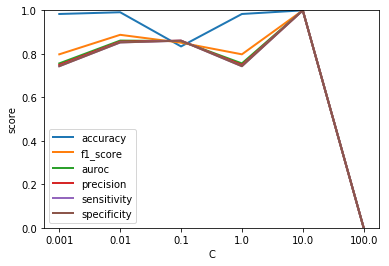

Best linear params:  [(0.9833333333333332, 0.001), (0.9913043478260869, 0.001), (0.8606078253211438, 100.0), (0.9833333333333332, 0.001), (1.0, 0.001), (0, 0)]


In [7]:
lin_best_params = select_param_linear(X_train, y_train, skf, p_metrics, plot=True)
print("Best linear params: ", lin_best_params)

In [8]:
lin_svm = SVC(10.3, kernel='linear')
lin_svm.fit(X_train, y_train)

SVC(C=10.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
lin_performance = [performance(y_test, lin_svm.predict(X_test), metric=m, test=True) for m in p_metrics]

In [10]:
lin_performance

[0.799475753604194,
 0.5984251968503937,
 0.7158128243763602,
 0.7080745341614907,
 0.5181818181818182,
 0.9134438305709024]

In [11]:
rbf_best_params = select_param_rbf(X_train, y_train, skf, p_metrics, plot=True)
print("Best rbf params: ", rbf_best_params)

C:  0.001 G:  0.25
C:  0.001 G:  0.5
C:  0.001 G:  0.75
C:  0.001 G:  1
C:  0.001 G:  1.5


KeyboardInterrupt: 

In [12]:
rbf_svm = SVC(0.1, kernel='rbf', gamma=0.4, verbose=True)
rbf_svm.fit(X_train, y_train)

[LibSVM]

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [13]:
rbf_performance = [performance(y_test, rbf_svm.predict(X_test), metric=m, test=True) for m in p_metrics]

In [14]:
rbf_performance

[0.7575360419397117,
 0.3018867924528302,
 0.5863050393437135,
 0.8888888888888888,
 0.18181818181818182,
 0.990791896869245]

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train,y_train)
dummy_accuracy = dummy.score(X_test,y_test)
print( "Dummy classifier accuracy is\n", dummy_accuracy )